# Driverless AI MLI BYOR: Built-in Explainers

Driverless AI provides robust interpretability of machine learning models
to explain modeling results in a human-readable format. In the 
Machine Learning Interpetability (MLI) view, Driverless AI offers various
techniques and methodologies for interpreting and explaining the results
of its models. These techniques are implemented as extensible set of recipes.

This notebook demonstrates how to list, search, run and get results of
**built-in** Driverless AI explainers.

## Install

Run this notebook in Python environment where you downloaded and installed **generated** Driverless AI **client**. Generated client can be downloaded from Driverless AI server on the following URL:

* `https://<host>:<port>/<context>/clients/py/old`

For example:
    
* https://driverlessai.intranet.com:12345/clients/py/old
* https://enterprise-puddle.h2o.ai/02d26869-7083-4351-95fa-6af57e0547b4/clients/py/old
    
And install the wheel (`x.xx.x` to be replaced with your Driverless AI version):

```
pip install ./h2oai_client-x.xx.x-py3-none-any.whl
```

Import required packages and modules:

In [63]:
import json
import os
import pprint
import time
from random import randint

import pandas
import matplotlib.pyplot as plt

import h2oai_client
from h2oai_client import messages

## Connect

Connect to Driverless AI server - make sure to use the same user name and password as when signing in through the GUI:

In [64]:
hostname = '127.0.0.1'
address = 'http://' + hostname + ':12345'
username = 'h2oai'
password = 'h2oai'

# h2oai = Client("http://localhost:12345", "h2oai", "h2oai")
h2oai = h2oai_client.Client(address = address, username = username, password = password)
h2oai.address

'http://127.0.0.1:12345'

## List Explainers

List available explainers:

In [65]:
explainers: list = h2oai.list_explainers(
    experiment_types=None, 
    explanation_scopes=None,
    dai_model_key=None,
    keywords=None,
    explainer_filter=[]
)

print("Explainer descriptor example:\n")
pprint.pprint(explainers[0].dump())

print("\nExplainers listing (name and ID):\n")
for explainer in explainers:
    print(f"  {explainer.name}: {explainer.id}")

Explainer descriptor example:

{'can_explain': ['regression', 'binomial'],
 'description': 'Permutation-based feature importance shows how much a model’s '
                'performance would change if a feature’s values were permuted. '
                'If the feature has little predictive power, shuffling its '
                'values should have little impact on the model’s performance. '
                'If a feature is highly predictive, however, shuffling its '
                'values should decrease the model’s performance. The '
                'difference between the model’s performance before and after '
                'permuting the feature provides the feature’s absolute '
                'permutation importance.',
 'explanation_scopes': ['global_scope'],
 'explanations': [{'category': None,
                   'explanation_type': 'global-feature-importance',
                   'formats': [],
                   'has_local': None,
                   'name': 'GlobalFeatImpExpl

**Descriptors** of both built-in explainers and custom explainers (uploaded 
by Driverless AI users) are returned by the server.

**Descriptor** provides explainer metadata:

* `id`
   * Unique identifier which is used to identify the explainer.
* `description`
   * Brief explainer description.
* `can_explain` 
   * Which experiment types can be explained - regression and/or binomial and/or multinomial.
* `explanation_scopes`
   * Does explainer provides global explanations, local explanations or both?
* `explanations`
   * Which types of explanations (like feature importance, decision tree, partial dependence) explainer provides and in which `formats` (like JSon, CSV or datatable frames) identified by MIME types.
* `parameters`
   * Overview of explainer parameters with types, default values and ranges.

## Filter Explainers

Listing of explainers can be filtered using their metadata.

Find explainers which can explain **binomial** experiments:

In [66]:
explainers: list = h2oai.list_explainers(
    experiment_types=["binomial"], 
    explanation_scopes=None,
    dai_model_key=None,
    keywords=None,
    explainer_filter=[]
)

print("\nExplainers:\n")
for explainer in explainers:
    print(f"  {explainer.name}")


Explainers:

  Absolute Permutation Feature Importance
  AutoDoc
  Disparate Impact Analysis
  Interpretability Data Zip (Surrogate and Shapley Techniques)
  NLP Leave-one-covariate-out (LOCO)
  NLP Partial Dependence Plot
  NLP Tokenizer
  NLP Vectorizer + Linear Model (VLM) Text Feature Importance
  Original Feature Importance
  Partial Dependence Plot
  Relative Permutation Feature Importance
  Sensitivity Analysis
  Shapley Summary Plot for Original Features (Naive Shapley Method)
  Shapley Values for Original Features (Kernel SHAP Method)
  Shapley Values for Original Features (Naive Method)
  Shapley Values for Transformed Features
  Surrogate Decision Tree
  Surrogate Random Forest Importance
  Surrogate Random Forest Leave-one-covariate-out (LOCO)
  Surrogate Random Forest Partial Dependence Plot
  Transformed Feature Importance
  k-LIME/LIME-SUP


Find explainers which are compatible with particular Driverless AI **model**:

In [67]:
# using the first experiment
models = h2oai.list_models(0, 1)
if not len(models.models):
    raise RuntimeError("No experiments - please create a new experiment")
    
MODEL_KEY = models.models[0].key
DATASET_KEY = models.models[0].parameters.dataset.key
TARGET_COL = models.models[0].parameters.target_col

print(f"Searching for explainers compatible with model {MODEL_KEY} (training dataset: {DATASET_KEY})...")
explainers = h2oai.list_explainers(
    dai_model_key=MODEL_KEY, 
    experiment_types=None,
    explanation_scopes=None,
    keywords=None,
    explainer_filter=[]
)

print("\nCompatible explainers:\n")
for explainer in explainers:
    print(f"  {explainer.name}")

Searching for explainers compatible with model aa2c1046-59a9-11ec-8fae-e86a64888647 (training dataset: 612b3840-569d-11ec-94f7-e86a64888647)...

Compatible explainers:

  AutoDoc
  Interpretability Data Zip (Surrogate and Shapley Techniques)
  NLP Leave-one-covariate-out (LOCO)
  NLP Partial Dependence Plot
  NLP Tokenizer
  Original Feature Importance
  Partial Dependence Plot
  Shapley Summary Plot for Original Features (Naive Shapley Method)
  Shapley Values for Original Features (Kernel SHAP Method)
  Shapley Values for Original Features (Naive Method)
  Shapley Values for Transformed Features
  Surrogate Decision Tree
  Surrogate Random Forest Importance
  Surrogate Random Forest Leave-one-covariate-out (LOCO)
  Transformed Feature Importance


# Run Explainer

Run **built-in** Driverless AI **Partial Dependence Plot explainer** shipped with Driverless AI server:

In [22]:
EXPLAINER_ID = [
    explainer.id for explainer in explainers if "Partial Dependence Plot" == explainer.name
][0]
EXPLAINER_ID

'h2oaicore.mli.byor.recipes.dai_pd_ice_explainer.DaiPdIceExplainer'

Use **interpretation parameters** to specify model and dataset to be explained:

In [33]:
params=h2oai_client.Client.build_common_dai_explainer_params(
    target_col=TARGET_COL,
    model_key=MODEL_KEY,
    dataset_key=DATASET_KEY,
)
params.dump()

{'common_params': {'target_col': 'EDUCATION',
  'weight_col': None,
  'prediction_col': None,
  'drop_cols': None,
  'sample_num_rows': None},
 'model': {'key': 'aa2c1046-59a9-11ec-8fae-e86a64888647', 'display_name': ''},
 'dataset': {'key': '612b3840-569d-11ec-94f7-e86a64888647',
  'display_name': ''},
 'validset': {'key': None, 'display_name': ''},
 'testset': {'key': None, 'display_name': ''},
 'use_raw_features': False,
 'config_overrides': None,
 'sequential_execution': True,
 'debug_model_errors': False,
 'debug_model_errors_class': ''}

**Run** explainer and use explainer **parameters** to calculate PD for `3` features only:

In [36]:
print(f"Running explainer: {EXPLAINER_ID} ...")

run_jobs = h2oai.run_explainers_sync(
    explainers=[
        messages.Explainer(
            explainer_id=EXPLAINER_ID,
            explainer_params=json.dumps({ "max_features": 3}),
    )],
    params=params,
)
run_jobs[0].dump()

Running explainer: h2oaicore.mli.byor.recipes.dai_pd_ice_explainer.DaiPdIceExplainer ...


{'mli_key': '52988cee-59ac-11ec-8fae-e86a64888647',
 'explainer_job_key': '52ae826a-59ac-11ec-8fae-e86a64888647',
 'explainer_job': {'progress': 1.0,
  'status': 0,
  'error': '',
  'message': 'Explainer 52ae826a-59ac-11ec-8fae-e86a64888647 run successfully finished',
  'entity': {'id': 'h2oaicore.mli.byor.recipes.dai_pd_ice_explainer.DaiPdIceExplainer',
   'name': 'Partial Dependence Plot',
   'description': '',
   'model_types': ['iid', 'time_series'],
   'can_explain': ['regression', 'binomial', 'multinomial'],
   'explanation_scopes': ['global_scope', 'local_scope'],
   'explanations': [{'explanation_type': 'global-partial-dependence',
     'name': 'DAI Partial Dependence Plot',
     'category': 'DAI MODEL',
     'scope': 'global',
     'has_local': 'local-individual-conditional-explanation',
     'formats': ['application/json']},
    {'explanation_type': 'local-individual-conditional-explanation',
     'name': 'DAI ICE',
     'category': 'DAI MODEL',
     'scope': 'local',
     'h

In [37]:
mli_key = run_jobs[0].mli_key
explainer_job_key = run_jobs[0].explainer_job_key
explainer_job = run_jobs[0].explainer_job

## Get Global Explanations

Explainer run **job** descriptor provides information about **types** and **formats** of available explanations.

In [38]:
for explanation in explainer_job.entity.explanations: pprint.pprint(explanation.dump())

{'category': 'DAI MODEL',
 'explanation_type': 'global-partial-dependence',
 'formats': ['application/json'],
 'has_local': 'local-individual-conditional-explanation',
 'name': 'DAI Partial Dependence Plot',
 'scope': 'global'}
{'category': 'DAI MODEL',
 'explanation_type': 'local-individual-conditional-explanation',
 'formats': ['application/vnd.h2oai.json+datatable.jay'],
 'has_local': None,
 'name': 'DAI ICE',
 'scope': 'local'}


Job descriptor indicates that there is global (PD) explanation in **JSon** format - let's download it:

In [95]:
BASE_URL = f"{address}/files/"
for explanation in explainer_job.entity.explanations:
    # lookup global explanation
    if "global" in explanation.explanation_type:
        for e_format in explanation.formats:
            server_path: str = h2oai.get_explainer_result_url_path(
                mli_key=mli_key,
                explainer_job_key=explainer_job_key,
                explanation_type=explanation.explanation_type,
                explanation_format=e_format
            )
            print(f"Explanation {explanation.explanation_type}:\n  {e_format}:\n    {BASE_URL}{server_path}")

            download_dir = "/tmp"
            downloaded_artifact = h2oai.download(server_path, download_dir)
            print(f"      {downloaded_artifact}")
        break

Explanation global-partial-dependence:
  application/json:
    http://127.0.0.1:12345/files/h2oai/mli_experiment_52988cee-59ac-11ec-8fae-e86a64888647/explainer_h2oaicore_mli_byor_recipes_dai_pd_ice_explainer_DaiPdIceExplainer_52ae826a-59ac-11ec-8fae-e86a64888647/global_partial_dependence/application_json/explanation.json
      /tmp/explanation.json


In [96]:
!cat {download_dir}/explanation.json

{
    "features": {
        "LIMIT_BAL": {
            "order": 0,
            "feature_type": [
                "numeric"
            ],
            "files": {
                "graduate": "pd_feature_0_class_0.json",
                "highschool": "pd_feature_0_class_1.json",
                "other": "pd_feature_0_class_2.json",
                "university": "pd_feature_0_class_3.json"
            }
        },
        "AGE": {
            "order": 1,
            "feature_type": [
                "numeric"
            ],
            "files": {
                "graduate": "pd_feature_1_class_0.json",
                "highschool": "pd_feature_1_class_1.json",
                "other": "pd_feature_1_class_2.json",
                "university": "pd_feature_1_class_3.json"
            }
        },
        "MARRIAGE": {
            "order": 2,
            "feature_type": [
                "categorical"
            ],
            "files": {
                "graduate": "pd_feature_2_class_0.json

Downloaded explanation **index** file contains information of per-feature per-class PD frames and other artifacts which migh be used to download particular explanation. Let's open data file for particular feature `LIMIT_BAL` and class `highschool`.

In [114]:
with open(f"{download_dir}/explanation.json") as json_file:
    pd_idx_json = json.load(json_file)

print(f"PD index:\n\n{pd_idx_json}")

PD index:

{'features': {'LIMIT_BAL': {'order': 0, 'feature_type': ['numeric'], 'files': {'graduate': 'pd_feature_0_class_0.json', 'highschool': 'pd_feature_0_class_1.json', 'other': 'pd_feature_0_class_2.json', 'university': 'pd_feature_0_class_3.json'}}, 'AGE': {'order': 1, 'feature_type': ['numeric'], 'files': {'graduate': 'pd_feature_1_class_0.json', 'highschool': 'pd_feature_1_class_1.json', 'other': 'pd_feature_1_class_2.json', 'university': 'pd_feature_1_class_3.json'}}, 'MARRIAGE': {'order': 2, 'feature_type': ['categorical'], 'files': {'graduate': 'pd_feature_2_class_0.json', 'highschool': 'pd_feature_2_class_1.json', 'other': 'pd_feature_2_class_2.json', 'university': 'pd_feature_2_class_3.json'}}}, 'metrics': [], 'default_class': 'graduate', 'documentation': 'Partial dependence (yellow) portrays the average prediction behavior of the Driverless AI model across the domain of an input variable along with +/- 1 standard deviation bands. ICE (grey) displays the prediction behavi

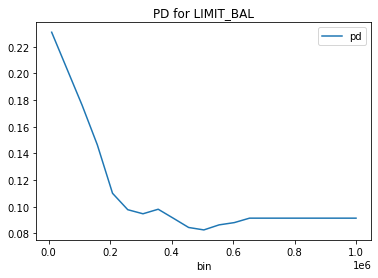

In [115]:
feature = "LIMIT_BAL"
clazz = "highschool"

downloaded_path = h2oai.download(
    server_path.replace(
        "explanation.json", 
        pd_idx_json["features"][feature]["files"][clazz],  # feature file name
    ), 
    download_dir
)

with open(downloaded_path) as json_file:
    pd_json = json.load(json_file)

# show PD data for particular feature
pandas.DataFrame(
    pd_json["data"]
).plot(
    kind='line', title=f"PD for {feature}", legend=True,
    x="bin",
    y="pd",
)
plt.show()

## Get Local Explanations

Explainer run **job** descriptor also provides information about **types** and **formats** of available **local** explanations. Explainations for individual dataset rows (instances, examples) might be downloaded with job and descriptor data.

Let's download and **visualize** local partial dependence data i.e. **ICE** for feature `LIMIT_BAL` and class `0`.

In [111]:
row = 1
feature = "LIMIT_BAL"
clazz = "graduate"  # note labels map at the end of index file

local_explanation = h2oai.get_explainer_local_result(
    mli_key=mli_key,
    explainer_job_key=explainer_job_key,
    explanation_type="local-individual-conditional-explanation",
    explanation_format="application/vnd.h2oai.json+datatable.jay",
    id_column_value=row,
    id_column_name="",
    page_offset=0,
    page_size=1,
    result_format="application/json",
    explanation_filter=[
        messages.FilterEntry("explain_feature", feature),
        messages.FilterEntry("explain_class", clazz),
    ],
)

print(f"Local explanation:\n\n{local_explanation}")

Local explanation:

{"prediction": 0.5072236657142639, "feature_value": 120000, "data": [{"bin": "10000", "ice": 0.3889581859111786}, {"bin": "109000", "ice": 0.44998666644096375}, {"bin": "158500", "ice": 0.5110692977905273}, {"bin": "208000", "ice": 0.5475447773933411}, {"bin": "257500", "ice": 0.5460748672485352}, {"bin": "307000", "ice": 0.561781644821167}, {"bin": "356500", "ice": 0.5803569555282593}, {"bin": "406000", "ice": 0.5703412890434265}, {"bin": "455500", "ice": 0.608392596244812}, {"bin": "505000", "ice": 0.6127075552940369}, {"bin": "554500", "ice": 0.6266824007034302}, {"bin": "604000", "ice": 0.627246618270874}, {"bin": "653500", "ice": 0.625383198261261}, {"bin": "703000", "ice": 0.625383198261261}, {"bin": "752500", "ice": 0.625383198261261}, {"bin": "802000", "ice": 0.625383198261261}, {"bin": "851500", "ice": 0.625383198261261}, {"bin": "901000", "ice": 0.625383198261261}, {"bin": "950500", "ice": 0.625383198261261}, {"bin": "1000000", "ice": 0.625383198261261}]}


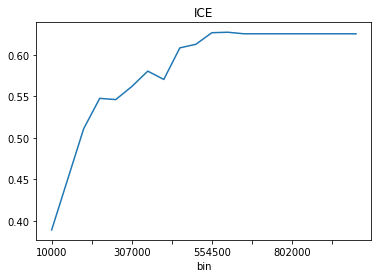

In [109]:
import pandas
import matplotlib.pyplot as plt

pandas.DataFrame(
    json.loads(local_explanation)["data"]
).plot(
    kind='line', title="ICE", legend=False,
    x="bin", y="ice",
)
plt.show()

**All** explainer's working data and explanations might be downloaded as ZIP archive:

In [49]:
server_path = h2oai.get_explainer_snapshot_url_path(
    mli_key=mli_key,
    explainer_job_key=explainer_job_key,
)
snapshot_url = f"{BASE_URL}{server_path}"
print(snapshot_url)
downloaded_artifact = h2oai.download(server_path, download_dir)
print(f"  {downloaded_artifact}")

http://127.0.0.1:12345/files/h2oai/mli_experiment_52988cee-59ac-11ec-8fae-e86a64888647/explainer_h2oaicore_mli_byor_recipes_dai_pd_ice_explainer_DaiPdIceExplainer_52ae826a-59ac-11ec-8fae-e86a64888647.zip
  /tmp/explainer_h2oaicore_mli_byor_recipes_dai_pd_ice_explainer_DaiPdIceExplainer_52ae826a-59ac-11ec-8fae-e86a64888647.zip


Explainer **log** can be downloaded from:

In [47]:
server_path = h2oai.get_explainer_run_log_url_path(
    mli_key=mli_key,
    explainer_job_key=explainer_job_key,
)
print(f"{BASE_URL}{server_path}")

http://127.0.0.1:12345/files/h2oai/mli_experiment_52988cee-59ac-11ec-8fae-e86a64888647/explainer_h2oaicore_mli_byor_recipes_dai_pd_ice_explainer_DaiPdIceExplainer_52ae826a-59ac-11ec-8fae-e86a64888647/log/explainer_run_52ae826a-59ac-11ec-8fae-e86a64888647.log


URL from above can be used to **download** choosen **custom** recipe result representation.

# Explain Model with ALL Compatible Explainers

In the explainer above 1 particular explainer was run. Running **all** compatible explainers is even simpler:

In [116]:
print(f"Running all compatible explainers...\n")
run_jobs = h2oai.run_explainers_sync(
    explainers=[],
    params=h2oai_client.Client.build_common_dai_explainer_params(
        target_col=TARGET_COL,
        model_key=MODEL_KEY,
        dataset_key=DATASET_KEY,
    ),
)
run_jobs

Running all compatible explainers...



In [56]:
print(f"Ran {len(run_jobs)} explainers:\n")
for run_job in run_jobs:
    print(f"{run_job.explainer_job.entity.name}: {run_job.explainer_job.status}")

Ran 10 explainers:

Shapley Values for Original Features (Naive Method): 0
Shapley Summary Plot for Original Features (Naive Shapley Method): 0
Interpretability Data Zip (Surrogate and Shapley Techniques): 0
Original Feature Importance: 0
Surrogate Random Forest Importance: 0
Surrogate Random Forest Leave-one-covariate-out (LOCO): 0
Transformed Feature Importance: 0
Surrogate Decision Tree: 0
Shapley Values for Transformed Features: 0
Partial Dependence Plot: 0


In order to check the status of particular explainer just check its job descriptor:

In [58]:
run_jobs[0].explainer_job.status

0

Job descriptor with all the details might be dumped as follows:

In [61]:
pprint.pprint(run_jobs[0].dump())

{'explainer_job': {'child_explainers_job_keys': [],
                   'created': 1639137102.88826,
                   'duration': 28.347280740737915,
                   'entity': {'can_explain': ['regression',
                                              'binomial',
                                              'multinomial'],
                              'description': '',
                              'explanation_scopes': ['global_scope',
                                                     'local_scope'],
                              'explanations': [{'category': 'DAI MODEL',
                                                'explanation_type': 'global-feature-importance',
                                                'formats': ['application/vnd.h2oai.json+datatable.jay',
                                                            'application/vnd.h2oai.json+csv',
                                                            'application/json'],
                                 

Explanations, snapshot, log and other artifacts might be downloaded in the same way as was demonstrated in case of 1 explainer run.